In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# give path to the data.csv 
file_path = '/content/data.csv' 

As one may see, the csv file contains actual labels and the predicted probabilities from two ML model (random forest and logistic regression).

In [ ]:
df = pd.read_csv(file_path)
df.head()

,y_act,y_pred_random_forest,y_pred_logistic
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


You have to take a threshold value and will have to predict final label. 
So add two new columns named as 'y_pred_rf'and 'y_pred_lr' in the df dataframe. These new columns will have final label predicted by the two models based on the threshold set.

In [ ]:
thresh=0
while (thresh<=10):
  i=thresh/10                                                                   # for different threshold values like 0.1,0.2,0.3,etc.
  df['y_pred_rf_'+str(i)] = (df.y_pred_random_forest>=i).astype('int')
  df['y_pred_lr_'+str(i)] = (df.y_pred_logistic>=i).astype('int')
  thresh+=1
df.head()

,y_act,y_pred_random_forest,y_pred_logistic,y_pred_rf_0.0,y_pred_lr_0.0,y_pred_rf_0.1,y_pred_lr_0.1,y_pred_rf_0.2,y_pred_lr_0.2,y_pred_rf_0.3,y_pred_lr_0.3,y_pred_rf_0.4,y_pred_lr_0.4,y_pred_rf_0.5,y_pred_lr_0.5,y_pred_rf_0.6,y_pred_lr_0.6,y_pred_rf_0.7,y_pred_lr_0.7,y_pred_rf_0.8,y_pred_lr_0.8,y_pred_rf_0.9,y_pred_lr_0.9,y_pred_rf_1.0,y_pred_lr_1.0
0,1,0.639816,0.531904,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
1,0,0.490993,0.414496,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.623815,0.569883,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
3,1,0.506616,0.443674,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.418302,0.369532,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(15758, 25)

Complete below function to compute true positive (tp), tn, fn, fp

In [ ]:
def compute_tp_tn_fn_fp(y_act, y_pred):
  tp=0
  tn=0
  fp=0
  fn=0
  for i in range(len(y_act)):
    if (y_act[i] == y_pred[i]):
      if (y_act[i]==0):
        tn+=1
      else:
        tp+=1
    else:
      if (y_act[i]==0):
        fp+=1
      else:
        fn+=1
  return tp,tn,fp,fn

In [ ]:
count=0
while (count<=10):
  tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(df.y_act,df['y_pred_lr_'+str(count/10)])
  print('For Threshold = ',count/10)
  print('TP for Logistic Reg :', tp_lr)
  print('TN for Logistic Reg :', tn_lr)
  print('FP for Logistic Reg :', fp_lr)
  print('FN for Logistic Reg :', fn_lr)
  print(' ')
  count+=1

For Threshold =  0.0
TP for Logistic Reg : 7879
TN for Logistic Reg : 0
FP for Logistic Reg : 7879
FN for Logistic Reg : 0
 
For Threshold =  0.1
TP for Logistic Reg : 7879
TN for Logistic Reg : 13
FP for Logistic Reg : 7866
FN for Logistic Reg : 0
 
For Threshold =  0.2
TP for Logistic Reg : 7878
TN for Logistic Reg : 17
FP for Logistic Reg : 7862
FN for Logistic Reg : 1
 
For Threshold =  0.3
TP for Logistic Reg : 7781
TN for Logistic Reg : 410
FP for Logistic Reg : 7469
FN for Logistic Reg : 98
 
For Threshold =  0.4
TP for Logistic Reg : 6535
TN for Logistic Reg : 2862
FP for Logistic Reg : 5017
FN for Logistic Reg : 1344
 
For Threshold =  0.5
TP for Logistic Reg : 4279
TN for Logistic Reg : 5425
FP for Logistic Reg : 2454
FN for Logistic Reg : 3600
 
For Threshold =  0.6
TP for Logistic Reg : 2406
TN for Logistic Reg : 6858
FP for Logistic Reg : 1021
FN for Logistic Reg : 5473
 
For Threshold =  0.7
TP for Logistic Reg : 1198
TN for Logistic Reg : 7500
FP for Logistic Reg : 379
F

In [ ]:
count=0
while (count<=10):
  tp_rf, tn_rf, fp_rf, fn_rf = compute_tp_tn_fn_fp(df.y_act,df['y_pred_rf_'+str(count/10)])
  print('For Threshold = ',count/10)
  print('TP for Random Forest :', tp_rf)
  print('TN for Random Forest :', tn_rf)
  print('FP for Random Forest :', fp_rf)
  print('FN for Random Forest :', fn_rf)
  print(' ')
  count+=1

For Threshold =  0.0
TP for Random Forest : 7879
TN for Random Forest : 0
FP for Random Forest : 7879
FN for Random Forest : 0
 
For Threshold =  0.1
TP for Random Forest : 7879
TN for Random Forest : 0
FP for Random Forest : 7879
FN for Random Forest : 0
 
For Threshold =  0.2
TP for Random Forest : 7879
TN for Random Forest : 4
FP for Random Forest : 7875
FN for Random Forest : 0
 
For Threshold =  0.3
TP for Random Forest : 7869
TN for Random Forest : 173
FP for Random Forest : 7706
FN for Random Forest : 10
 
For Threshold =  0.4
TP for Random Forest : 7411
TN for Random Forest : 1930
FP for Random Forest : 5949
FN for Random Forest : 468
 
For Threshold =  0.5
TP for Random Forest : 5047
TN for Random Forest : 5519
FP for Random Forest : 2360
FN for Random Forest : 2832
 
For Threshold =  0.6
TP for Random Forest : 2239
TN for Random Forest : 7417
FP for Random Forest : 462
FN for Random Forest : 5640
 
For Threshold =  0.7
TP for Random Forest : 499
TN for Random Forest : 7849
FP

Let's verify result from sklearn

In [ ]:
from sklearn.metrics import confusion_matrix
tn_rf1, fp_rf1, fn_rf1, tp_rf1 = confusion_matrix(df.y_act, df['y_pred_rf_'+str(0.5)]).ravel()

In [ ]:
print('For Threshold = 0.5')
print('TP for Random Forest :', tp_rf1)
print('TN for Random Forest :', tn_rf1)
print('FP for Random Forest :', fp_rf1)
print('FN for Random Forest :', fn_rf1)

For Threshold = 0.5
TP for Random Forest : 5047
TN for Random Forest : 5519
FP for Random Forest : 2360
FN for Random Forest : 2832


In a similar way complete all the functions below

In [ ]:
def compute_accuracy(tp, tn, fn, fp):
	acc_ii=((tp/(tp+fn))+(tn/(tn+fp)))/2
	return acc_ii*100

In [ ]:
count=0
while (count<=10):
  tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(df.y_act,df['y_pred_lr_'+str(count/10)])
  tp_rf, tn_rf, fp_rf, fn_rf = compute_tp_tn_fn_fp(df.y_act,df['y_pred_rf_'+str(count/10)])
  print('For Threshold = ',count/10)
  print('Accuracy for Logistic Regression :', compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
  print('Accuracy for Random Forest :', compute_accuracy(tp_rf, tn_rf, fn_rf, fp_rf))
  print(' ')
  count+=1

For Threshold =  0.0
Accuracy for Logistic Regression : 50.0
Accuracy for Random Forest : 50.0
 
For Threshold =  0.1
Accuracy for Logistic Regression : 50.08249777890595
Accuracy for Random Forest : 50.0
 
For Threshold =  0.2
Accuracy for Logistic Regression : 50.10153572788425
Accuracy for Random Forest : 50.02538393197106
 
For Threshold =  0.3
Accuracy for Logistic Regression : 51.97994669374286
Accuracy for Random Forest : 51.034395227820795
 
For Threshold =  0.4
Accuracy for Logistic Regression : 59.633202183018156
Accuracy for Random Forest : 59.27782713542328
 
For Threshold =  0.5
Accuracy for Logistic Regression : 61.58141896179718
Accuracy for Random Forest : 67.05165630156111
 
For Threshold =  0.6
Accuracy for Logistic Regression : 58.789186444980324
Accuracy for Random Forest : 61.276811778144435
 
For Threshold =  0.7
Accuracy for Logistic Regression : 55.19736007107501
Accuracy for Random Forest : 52.97626602360705
 
For Threshold =  0.8
Accuracy for Logistic Regressi

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('For Threshold = 0.5')
print('Accuracy for Logistic Regression :', 100* accuracy_score(df.y_act, 
                                                           df['y_pred_lr_'+str(0.5)]))
print('Accuracy for Random Forest :', 100*accuracy_score(df.y_act, 
                                                           df['y_pred_rf_'+str(0.5)]))

For Threshold = 0.5
Accuracy for Logistic Regression : 61.58141896179718
Accuracy for Random Forest : 67.05165630156111


In [ ]:
def compute_precision(tp,fp):
  if (tp+fp!=0):
    precision=tp/(tp+fp)
    return precision*100

In [ ]:
count=0
while (count<=10):
  tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(df.y_act,df['y_pred_lr_'+str(count/10)])
  tp_rf, tn_rf, fp_rf, fn_rf = compute_tp_tn_fn_fp(df.y_act,df['y_pred_rf_'+str(count/10)])
  print('For Threshold = ',count/10)
  print('Precision for Logistic Regression :', compute_precision(tp_lr,fp_lr))
  print('Precision for Random Forest :', compute_precision(tp_rf,fp_rf))
  print(' ')
  count+=1

For Threshold =  0.0
Precision for Logistic Regression : 50.0
Precision for Random Forest : 50.0
 
For Threshold =  0.1
Precision for Logistic Regression : 50.04128294696729
Precision for Random Forest : 50.0
 
For Threshold =  0.2
Precision for Logistic Regression : 50.05082592121982
Precision for Random Forest : 50.01269518852355
 
For Threshold =  0.3
Precision for Logistic Regression : 51.02295081967213
Precision for Random Forest : 50.52327447833066
 
For Threshold =  0.4
Precision for Logistic Regression : 56.570290858725755
Precision for Random Forest : 55.471556886227546
 
For Threshold =  0.5
Precision for Logistic Regression : 63.55265112134264
Precision for Random Forest : 68.1382476036182
 
For Threshold =  0.6
Precision for Logistic Regression : 70.20717829004961
Precision for Random Forest : 82.89522399111439
 
For Threshold =  0.7
Precision for Logistic Regression : 75.96702599873177
Precision for Random Forest : 94.3289224952741
 
For Threshold =  0.8
Precision for Logi

In [ ]:
from sklearn.metrics import precision_score
print('For Threshold = 0.5')
print('Precision for Logistic Regression :', 100* precision_score(df.y_act, 
                                                           df['y_pred_lr_'+str(0.5)]))
print('Precision for Random Forest :', 100* precision_score(df.y_act, 
                                                           df['y_pred_rf_'+str(0.5)]))

For Threshold = 0.5
Precision for Logistic Regression : 63.55265112134264
Precision for Random Forest : 68.1382476036182


In [ ]:
def compute_recall(tp,fn):
  if (tp+fn!=0):
    recall=tp/(tp+fn)
    return recall*100

In [ ]:
count=0
while (count<=10):
  tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(df.y_act,df['y_pred_lr_'+str(count/10)])
  tp_rf, tn_rf, fp_rf, fn_rf = compute_tp_tn_fn_fp(df.y_act,df['y_pred_rf_'+str(count/10)])
  print('For Threshold = ',count/10)
  print('Recall for Logistic Regression :', compute_recall(tp_lr,fn_lr))
  print('Recall for Random Forest :', compute_recall(tp_rf,fn_rf))
  print(' ')
  count+=1

For Threshold =  0.0
Recall for Logistic Regression : 100.0
Recall for Random Forest : 100.0
 
For Threshold =  0.1
Recall for Logistic Regression : 100.0
Recall for Random Forest : 100.0
 
For Threshold =  0.2
Recall for Logistic Regression : 99.98730803401446
Recall for Random Forest : 100.0
 
For Threshold =  0.3
Recall for Logistic Regression : 98.75618733341794
Recall for Random Forest : 99.8730803401447
 
For Threshold =  0.4
Recall for Logistic Regression : 82.94199771544612
Recall for Random Forest : 94.06015991877142
 
For Threshold =  0.5
Recall for Logistic Regression : 54.30892245208783
Recall for Random Forest : 64.05635232897576
 
For Threshold =  0.6
Recall for Logistic Regression : 30.536870161187966
Recall for Random Forest : 28.417311841604263
 
For Threshold =  0.7
Recall for Logistic Regression : 15.204975250666328
Recall for Random Forest : 6.333291026780048
 
For Threshold =  0.8
Recall for Logistic Regression : 6.295215128823455
Recall for Random Forest : 0.93920

In [ ]:
from sklearn.metrics import recall_score
print('For Threshold = 0.5')
print('Recall for Logistic Regression :', 100* recall_score(df.y_act, 
                                                           df['y_pred_lr_'+str(0.5)]))
print('Recall for Random Forest :', 100* recall_score(df.y_act, 
                                                           df['y_pred_rf_'+str(0.5)]))

For Threshold = 0.5
Recall for Logistic Regression : 54.30892245208783
Recall for Random Forest : 64.05635232897576


In [ ]:
def compute_f1_score(y_true, y_pred):
    # calculates the F1 score. Complete function
    tp,tn,fp,fn=compute_tp_tn_fn_fp(y_true,y_pred)
    precision=compute_precision(tp,fp)
    recall=compute_recall(tp,fn)
    if precision is None:
      return "Non Existent"
    else:
      f1_score=(2*precision*recall)/(precision+recall)
      return f1_score/100

In [ ]:
count=0
while (count<=10):
  print('For Threshold = ',count/10)
  print('F1 score for Logistic Regression :', compute_f1_score(df.y_act, 
                                                              df['y_pred_lr_'+str(count/10)]))
  print('F1 score for Random Forest :', compute_f1_score(df.y_act, 
                                                              df['y_pred_rf_'+str(count/10)]))
  print(' ')
  count+=1

For Threshold =  0.0
F1 score for Logistic Regression : 0.6666666666666667
F1 score for Random Forest : 0.6666666666666667
 
For Threshold =  0.1
F1 score for Logistic Regression : 0.6670335252285811
F1 score for Random Forest : 0.6666666666666667
 
For Threshold =  0.2
F1 score for Logistic Regression : 0.6670900546170455
F1 score for Random Forest : 0.6667795032369992
 
For Threshold =  0.3
F1 score for Logistic Regression : 0.6728349690864284
F1 score for Random Forest : 0.6710156050140702
 
For Threshold =  0.4
F1 score for Logistic Regression : 0.6726365086717102
F1 score for Random Forest : 0.6978671312208674
 
For Threshold =  0.5
F1 score for Logistic Regression : 0.5856830002737476
F1 score for Random Forest : 0.660342797330891
 
For Threshold =  0.6
F1 score for Logistic Regression : 0.4256147178489298
F1 score for Random Forest : 0.4232514177693762
 
For Threshold =  0.7
F1 score for Logistic Regression : 0.2533840947546532
F1 score for Random Forest : 0.1186964795432921
 
F

In [ ]:
from sklearn.metrics import f1_score
print('F1 score for Logistic Regression :', f1_score(df.y_act, df['y_pred_lr_'+str(0.5)]))
print('F1 score for Random Forest :', f1_score(df.y_act, df['y_pred_rf_'+str(0.5)]))

F1 score for Logistic Regression : 0.5856830002737475
F1 score for Random Forest : 0.660342797330891


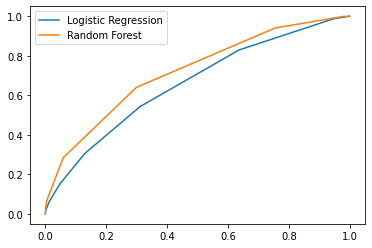

In [ ]:
import matplotlib.pyplot as plt

threshold=0
tpr_lr=[]
fpr_lr=[]
tpr_rf=[]
fpr_rf=[]
while (threshold/10<=1):
  tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(df.y_act,df['y_pred_lr_'+str(threshold/10)])
  tp_rf, tn_rf, fp_rf, fn_rf = compute_tp_tn_fn_fp(df.y_act,df['y_pred_rf_'+str(threshold/10)])
  tprlr= tp_lr/(tp_lr+fn_lr)
  fprlr= fp_lr/(fp_lr+tn_lr)
  tprrf= tp_rf/(tp_rf+fn_rf)
  fprrf= fp_rf/(fp_rf+tn_rf)
  tpr_lr.append(tprlr)
  fpr_lr.append(fprlr)
  tpr_rf.append(tprrf)
  fpr_rf.append(fprrf)
  threshold+=1
plt.plot(fpr_lr,tpr_lr,label='Logistic Regression')
plt.plot(fpr_rf,tpr_rf,label='Random Forest')
plt.legend()
plt.show()